# 拉格朗日乘子法

如果你要优化一个函数，但是这个函数里面的参数又要服从另一个函数，那么这时候经常需要使用拉格朗日乘子法来进行求解。

拉格朗日乘子法可以将一个包含n个变量的函数f和有k个等式约束条件g的最优化问题，转换为一个包含n+k个变量的无约束的函数求极值问题。

公式表达为：

$
\begin{aligned}
& min f(x) \\[4mm]
& s.t. \quad g_i(x)=0, \quad i=1,2,\dots, k \\[4mm]
& L(x, \lambda) = f(x) + \sum_{i=1}^k \lambda_ig_i(x) \\[4mm]
\end{aligned}
$

其中，s.t.表示表示subject to ，“受限于”的意思，k表示有k个约束条件。

所以求解时，通过计算偏导得到极值点，即：

$
\begin{aligned}
& \frac{\partial L(x, \lambda)}{\partial x} = 0 \\[4mm]
& \frac{\partial L(x, \lambda)}{\partial \lambda_i} = 0 \quad i=1,2,\dots,k \\[4mm]
\end{aligned}
$

## 举例，长方体表面积固定时，体积最大是多少？

在表面积S固定为 $a^2$ 时，体积V最大可能的值是多少？

因此得：

$
\left\{
\begin{aligned}
& V = xyz\\[4mm]
& S = 2xy + 2yz + 2xz = a^2
\end{aligned}
\right.
$

因此拉格朗日函数：

$L(x, y, z, \lambda) = xyz + \lambda(2xy + 2yz + 2xz - a^2)$

接下来对各个参数求偏导，并让其偏导为0

$
\left\{
\begin{aligned}
& \frac{\partial L(x, y, z, \lambda)}{\partial x} = 0 \\[4mm]
& \frac{\partial L(x, y, z, \lambda)}{\partial y} = 0 \\[4mm]
& \frac{\partial L(x, y, z, \lambda)}{\partial z} = 0 \\[4mm]
& \frac{\partial L(x, y, z, \lambda)}{\partial \lambda} = 0 \\[4mm]
\end{aligned}
\right.
$

带入可得：

$
\left\{
\begin{aligned}
& yz + 2\lambda(y + z) \\[4mm]
& xz + 2\lambda(x + z) \\[4mm]
& xy + 2\lambda(x + y) \\[4mm]
& 2xy + 2yz + 2xz - a^2 = 0 \\[4mm]
\end{aligned}
\right.
$

因此得：
$
\left\{
\begin{aligned}
& \frac{xz = -2\lambda(x + z)}{yz = -2\lambda(y + z)} \\[4mm]
& \frac{xy = -2\lambda(x + y)}{xz = -2\lambda(x + z)} \\[4mm]
\end{aligned}
\right.
$
进而
$
\left\{
\begin{aligned}
& \frac{x}{y} = \frac{x+z}{y+z} \\[4mm]
& \frac{y}{z} = \frac{x+y}{x+z} \\[4mm]
\end{aligned}
\right.
$
可得：$x=y=z$

最后可以得到：

$ x=y=z = \frac{\sqrt{6}}{6} a$

所以：

$V = \frac{\sqrt{6}}{36}a^3$


### 参考

https://www.bilibili.com/video/BV1NH4y1q7Ef?spm_id_from=333.788.videopod.sections&vd_source=099edd8ba094e7ddc14190b99d15a5fe

https://www.cnblogs.com/mo-wang/p/4775548.html

拉格朗日对偶问题的参考

https://www.bilibili.com/video/BV1HP4y1Y79e/?spm_id_from=333.1387.favlist.content.click&vd_source=099edd8ba094e7ddc14190b99d15a5fe

## 拉格朗日对偶问题的理论框架

假设我们有一个优化问题：

**原问题（Primal Problem）**：

$$
\min_{x} f(x), \quad \text{subject to} \quad g(x) \leq 0, \quad h(x) = 0
$$

其中 $ f(x) $ 是目标函数，$ g(x) $ 和 $ h(x) $ 分别是不等式约束和等式约束。

我们引入拉格朗日乘子 $ \lambda $ 对不等式约束进行处理，拉格朗日乘子法的拉格朗日函数为：

$$
L(x, \lambda) = f(x) + \lambda^T g(x)
$$

然后我们对 $ x $ 和 $ \lambda $ 进行优化：

- 对 $ x $ 求最小值，得到原问题的最优解。
- 对 $ \lambda $ 求最大值，得到对偶问题。

**对偶问题**就是将拉格朗日函数关于 $ x $ 的最小值插入拉格朗日对偶函数中：

$$
\max_{\lambda \geq 0} \min_{x} L(x, \lambda)
$$

最终，通过求解这个对偶问题，我们可以获得原问题的下界。


---

在拉格朗日问题中，互补松弛条件（**complementary slackness**）是 KKT 条件的一部分，用于描述约束激活的情况。它规定了拉格朗日乘子与其对应的约束必须满足以下条件：

$$
\lambda_i \cdot g_i(x) = 0 \quad \text{对于每个不等式约束 \(g_i(x) \leq 0\)}.
$$

这表示：
1. 如果约束 $g_i(x)$ 激活（即 $g_i(x) = 0$），那么对应的拉格朗日乘子 $\lambda_i > 0$。
2. 如果约束 $g_i(x)$ 未激活（即 $g_i(x) < 0$），那么对应的拉格朗日乘子 $\lambda_i = 0$。

---

### 举个例子

`scipy.optimize.minimize` 并未直接使用拉格朗日对偶的具体公式，而是通过内部算法（例如序列二次规划或内点法）解决原问题。优化器隐式地使用了拉格朗日函数和 KKT 条件来处理约束问题。这与拉格朗日对偶的核心思想（通过拉格朗日函数处理约束）一致，但其细节被封装在优化器的实现中。

---

#### **新的目标函数**
$$
f(x, y) = (x - 1)^2 + (y - 1)^2
$$
此函数表示点 $(x, y)$ 到点 $(1, 1)$ 的欧几里得距离平方。

#### **约束条件**
1. $ x + y \leq 1 $ （约束1）
2. $ x \geq 0 $ （约束2）
3. $ y \geq 0 $ （约束3）

#### **目标**
找到 $ f(x, y) $ 的最小值，并推导结果。

---

### **数学推导**
我们将通过手动推导的方式求解这个问题。

#### **1. 构造拉格朗日函数**
定义拉格朗日函数：
$$
\mathcal{L}(x, y, \lambda_1, \lambda_2, \lambda_3) = (x - 1)^2 + (y - 1)^2 + \lambda_1 (x + y - 1) - \lambda_2 x - \lambda_3 y
$$
其中：
- $ \lambda_1, \lambda_2, \lambda_3 \geq 0 $ 是拉格朗日乘子。
- 约束条件通过乘以拉格朗日乘子引入。

---

#### **2. KKT 条件**
满足最优解的必要条件：
1. 梯度条件（对 $x, y$ 求偏导）：
   $$
   \frac{\partial \mathcal{L}}{\partial x} = 2(x - 1) + \lambda_1 - \lambda_2 = 0
   $$
   $$
   \frac{\partial \mathcal{L}}{\partial y} = 2(y - 1) + \lambda_1 - \lambda_3 = 0
   $$

2. 约束条件必须满足：
   $$
   x + y \leq 1, \quad x \geq 0, \quad y \geq 0
   $$

3. 互补松弛条件：
   $$
   \lambda_1 (x + y - 1) = 0, \quad \lambda_2 x = 0, \quad \lambda_3 y = 0
   $$

---

#### **3. 分析解**
1. **考虑约束是否激活**：
   - 如果 $ x + y = 1 $ 激活，则 $ \lambda_1 > 0 $。
   - 如果 $ x = 0 $ 激活，则 $ \lambda_2 > 0 $。
   - 如果 $ y = 0 $ 激活，则 $ \lambda_3 > 0 $。

2. **代入梯度条件和约束条件**：
   假设 $ x + y = 1 $，且 $ x, y \geq 0 $。结合梯度条件：
   $$
   2(x - 1) + \lambda_1 = 0
   $$
   $$
   2(y - 1) + \lambda_1 = 0
   $$
   因为 $ x + y = 1 $，所以 $ y = 1 - x $。代入：
   $$
   2(x - 1) + \lambda_1 = 0 \quad \text{和} \quad 2((1 - x) - 1) + \lambda_1 = 0
   $$
   化简：
   $$
   2x - 2 + \lambda_1 = 0 \quad \text{和} \quad -2x + \lambda_1 = 0
   $$
   联立解得：
   $$
   x = 0.5, \quad y = 0.5, \quad \lambda_1 = 1
   $$

---

### **运行结果**
1. **数学解**：
   - 最优点：$ x = 0.5, y = 0.5 $
   - 最优值：$ f(x, y) = 0.5 $

2. **图形显示**：
   - 目标函数的等高线图。
   - 蓝色三角形表示约束区域。
   - 红点标记了最优点。

---

### **总结**
1. **拉格朗日对偶**：
   在手动推导中，我们通过引入拉格朗日函数和 KKT 条件，找到满足约束的最优解。
2. **Python代码**：
   使用 `scipy.optimize.minimize` 自动处理约束优化问题，并通过可视化展示结果。
3. **扩展性**：
   该方法可以推广到更复杂的多维优化问题或更复杂的约束场景。

最优解: x = 0.4999999999999989, y = 0.4999999999999989
最优值: f(x, y) = 0.5000000000000022


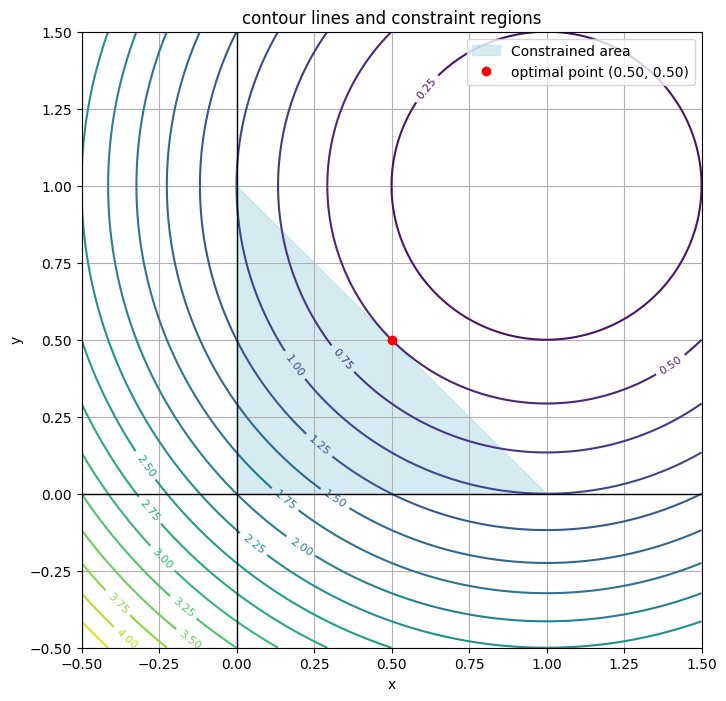

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 目标函数
def objective(xy):
    x, y = xy
    return (x-1)**2 + (y-1)**2

# 约束条件
constraints = [
    {'type': 'ineq', 'fun': lambda xy: 1 - (xy[0] + xy[1])},  # x + y <= 1
    {'type': 'ineq', 'fun': lambda xy: xy[0]},  # x >= 0
    {'type': 'ineq', 'fun': lambda xy: xy[1]}   # y >= 0
]

# 初始猜测值
initial_guess = [0.0, 0.0]

# 使用 scipy.optimize.minimize 求解
result = minimize(objective, initial_guess, constraints=constraints)

# 优化结果
optimal_point = result.x
optimal_value = result.fun

print(f"最优解: x = {optimal_point[0]}, y = {optimal_point[1]}")
print(f"最优值: f(x, y) = {optimal_value}")

# 绘制等高线图和约束区域
x = np.linspace(-0.5, 1.5, 400)
y = np.linspace(-0.5, 1.5, 400)
X, Y = np.meshgrid(x, y)
Z = (X-1)**2 + (Y-1)**2

# 绘制等高线
plt.figure(figsize=(8, 8))
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# 绘制约束区域
plt.fill_between(x, 0, 1-x, where=(x >= 0) & (1-x >= 0), color='lightblue', alpha=0.5, label='Constrained area') # 约束区域
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# 标记最优点
plt.plot(optimal_point[0], optimal_point[1], 'ro', label=f'optimal point ({optimal_point[0]:.2f}, {optimal_point[1]:.2f})')

# 图例和标题
plt.title("contour lines and constraint regions") # 二维优化问题: 等高线与约束区域
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


### 通过对偶的方式求解

你提到的形式是拉格朗日对偶问题的经典框架：  
$$
\max_{\lambda \geq 0} \min_{x} L(x, \lambda)
$$  
这确实是拉格朗日对偶问题的一般公式，它反映了对偶函数的构造过程。然而，在我之前的例子中没有明确展示这个双层优化的过程，是因为数值优化工具（如 `scipy.optimize.minimize`）隐式处理了这些细节。让我详细说明为什么这个公式没直接出现，以及如何显式地构建这种形式。

---

### 1. **原问题和对偶问题的关系**

在约束优化问题中：
$$
\min_x f(x), \quad \text{subject to } g_i(x) \leq 0 \text{ for } i = 1, \dots, m
$$

拉格朗日函数为：
$$
L(x, \lambda) = f(x) + \sum_{i=1}^m \lambda_i g_i(x), \quad \lambda_i \geq 0
$$

**原问题**可以写作：
$$
\min_x \max_{\lambda \geq 0} L(x, \lambda)
$$

**对偶问题**则是交换顺序，变为：
$$
\max_{\lambda \geq 0} \min_x L(x, \lambda)
$$

这里的对偶函数 $ g(\lambda) $ 是：
$$
g(\lambda) = \min_x L(x, \lambda)
$$

对偶问题的目标是最大化 $ g(\lambda) $，即：
$$
\max_{\lambda \geq 0} g(\lambda)
$$

---

### 2. **手动数学推导的步骤**

#### 拉格朗日函数的构建

1. **目标函数**：
   $$
   f(x, y) = (x - 1)^2 + (y - 1)^2
   $$

2. **约束条件**：
   - $ x + y - 1 \leq 0 $
   - $ -x \leq 0 $（即 $ x \geq 0 $）
   - $ -y \leq 0 $（即 $ y \geq 0 $）

#### 对偶函数 $g(\lambda)$ 的求解
固定 $\lambda = (\lambda_1, \lambda_2, \lambda_3)$，拉格朗日函数为：
$$
L(x, y, \lambda) = (x - 1)^2 + (y - 1)^2 + \lambda_1 (x + y - 1) - \lambda_2 x - \lambda_3 y
$$
对 $x, y$ 求最小值，需要计算偏导并设置为 0：
$$
\frac{\partial L}{\partial x} = 2(x - 1) + \lambda_1 - \lambda_2 = 0
$$
$$
\frac{\partial L}{\partial y} = 2(y - 1) + \lambda_1 - \lambda_3 = 0
$$

解得：
$$
x = \frac{2 - \lambda_1 + \lambda_2}{2}, \quad y = \frac{2 - \lambda_1 + \lambda_3}{2}
$$

需要满足约束条件 $x, y \geq 0$，代入后即可计算 $g(\lambda)$。

#### 最大化对偶函数
对 $g(\lambda)$ 最大化，检查约束 $\lambda_i \geq 0$，得到最优的 $\lambda$。

---

### 总结

1. 拉格朗日对偶问题的核心是先对 $x, y$ 求最小值，再对 $\lambda$ 求最大值。
2. 数值优化需要显式地构建拉格朗日函数，并通过双层优化框架求解。
3. 在之前的例子中，`scipy.optimize.minimize`直接解决了原问题，但对偶问题需要手动实现 $\max \min$ 的双层结构。
4. 手动推导每个步骤，可以更清晰地理解对偶问题的结构和解法。

In [15]:
import numpy as np
from scipy.optimize import minimize

# 对偶函数
def dual_function(lambdas):
    lambda1, lambda2, lambda3 = lambdas
    x1 = (2 - lambda1 + lambda2) / 2  # 我们通过求偏导解出来的关系
    x2 = (2 - lambda1 + lambda3) / 2
    return (x1 - 1)**2 + (x2 - 1)**2 + lambda1 * (x1 + x2 - 1) - lambda2 * x1 - lambda3 * x2

# 对偶问题：最大化 g(lambda)
def solve_dual():
    # 初始 lambda 值
    lambda0 = [0.1, 0.1, 0.1]
    # 约束：lambda >= 0
    bounds = [(0, None), (0, None), (0, None)]
    # 最大化对偶函数
    result = minimize(lambda lambdas: -dual_function(lambdas), x0=lambda0, bounds=bounds)
    return result.x, -result.fun

# 求解
optimal_lambdas, optimal_value = solve_dual()
print("最优拉格朗日乘子:", optimal_lambdas)
print("最优对偶值:", optimal_value)


最优拉格朗日乘子: [1.00000128 0.         0.        ]
最优对偶值: 0.49999999999917927


可以发现，通过对偶问题解出来的结果 和 通过原问题求解 结果相同。

我感觉拉格朗日对偶问题主要是用在数学推导上，应该用不到代码的编写上。

因为scipy直接可以对原问题，根据输入约束条件进行求解。